In [1]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [14, 6]})

In [4]:
# Mean Reversion - (Pairs Trading) Long Pair: Long stock A and short stock B Short Pair: Short stock A and long stock BYou want to find a high correlation between stock A and B's price (usually > 0.8) -- in this case let's say 0.9. If you find a relationship suggesting that the prices move in opposite directions, you can capitalize on this behavior. ONCE the assets deviate from their typical correlation, say 0.5, you can long/short the pair since you expect the correlation to converge back to its original form. Sort of becomes an art when you try to maximize the spread between the assets

In [5]:
#Strategy

#Find 2 assets that move similarly with eachother (whether it be a negative or positive correlation) Sell the 'overvalued' stock and buy the 'undervalued' stock
#A common signal to use to triger the purchase of a pair trade is to use the Price Ratio (Stock A / Stock B).
#If the ratio changes significantly, then you know it is time to trade. 'Significance' can be measured with standard deviation.

In [6]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
start_date = "2019-10-17" 
end_date = "2023-10-17"
symbols = ['NVDA', 'META', 'TSLA', 'AMZN', 'GOOG', 'AAPL', 'AMD', 'ADBE', 'MSFT', 'NFLX', 'KO', 'PEP','RBGLY']
stocks_df = yf.download(symbols, start = start_date, end = end_date)['Adj Close']
stocks_df.head().dropna()

[*********************100%%**********************]  13 of 13 completed


Ticker           AAPL        ADBE        AMD       AMZN       GOOG         KO  \
Date                                                                            
2019-10-17  56.982700  269.239990  31.139999  89.374001  62.653500  46.748077   
2019-10-18  57.256378  265.519989  30.969999  87.875504  62.274502  47.608467   
2019-10-21  58.249359  266.839996  32.029999  89.282997  62.307499  47.130474   
2019-10-22  58.116158  261.089996  31.510000  88.286499  62.139999  46.800213   
2019-10-23  58.896011  261.320007  31.360001  88.108498  62.956501  47.486805   

Ticker            META        MSFT        NFLX       NVDA         PEP  \
Date                                                                    
2019-10-17  190.188202  133.665390  293.350006  48.345497  120.647995   
2019-10-18  185.653030  131.483734  275.299988  47.399929  120.022568   
2019-10-21  189.558868  132.459732  278.049988  48.773479  119.908028   
2019-10-22  182.146729  130.488556  266.690002  48.673954  120.383743   
2019-10-23  185.952698  131.321060  271.269989  48.544559  121.079659   

Ticker          RBGLY       TSLA  
Date                              
2019-10-17  13.708300  17.464666  
2019-10-18  13.699601  17.129999  
2019-10-21  13.403864  16.900000  
2019-10-22  13.255994  17.038668  
2019-10-23  13.508242  16.978666

In [30]:
stocks_df.tail()

Ticker            AAPL        ADBE         AMD        AMZN        GOOG  \
Date                                                                     
2023-10-10  177.687241  532.719971  109.010002  129.479996  139.199997   
2023-10-11  179.091675  549.909973  108.309998  131.830002  141.699997   
2023-10-12  179.998093  559.630005  108.790001  132.330002  140.289993   
2023-10-13  178.145432  548.760010  105.089996  129.789993  138.580002   
2023-10-16  178.015930  550.739990  106.459999  132.550003  140.490005   

Ticker             KO        META        MSFT        NFLX        NVDA  \
Date                                                                    
2023-10-10  53.177822  321.498871  326.530945  373.320007  457.918274   
2023-10-11  52.862873  327.472565  330.538147  365.929993  467.996918   
2023-10-12  51.977070  323.816437  329.285278  361.200012  469.386719   
2023-10-13  52.055805  314.356476  325.874695  355.679993  454.548676   
2023-10-16  52.587288  320.809601  330.756897  360.820007  460.887848   

Ticker             PEP      RBGLY        TSLA  
Date                                           
2023-10-10  161.920227  13.997182  263.619995  
2023-10-11  160.167084  14.074998  262.989990  
2023-10-12  155.695557  13.831822  258.869995  
2023-10-13  157.586594  13.802641  251.119995  
2023-10-16  158.650299  13.802641  253.919998

In [31]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

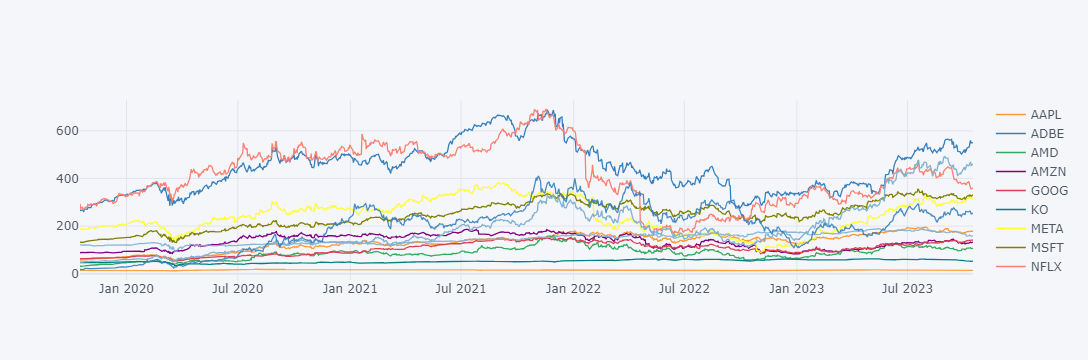

In [32]:
stocks_df.iplot()

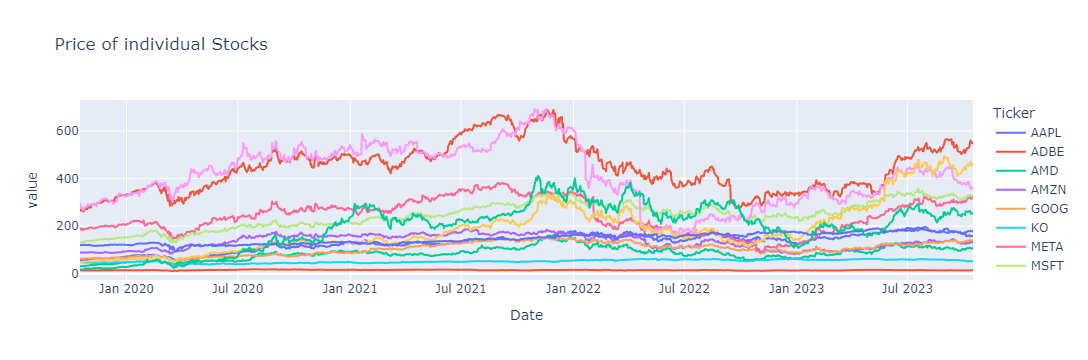

In [33]:
fig_price=px.line(stocks_df, title='Price of individual Stocks')
fig_price.show()

In [34]:
corr_matrix = stocks_df.corr()
corr_matrix

Ticker      AAPL      ADBE       AMD      AMZN      GOOG        KO      META  \
Ticker                                                                         
AAPL    1.000000  0.441178  0.826053  0.299426  0.838457  0.770904  0.255284   
ADBE    0.441178  1.000000  0.737592  0.858294  0.706781 -0.032479  0.896043   
AMD     0.826053  0.737592  1.000000  0.591216  0.868022  0.459492  0.565047   
AMZN    0.299426  0.858294  0.591216  1.000000  0.532779 -0.233876  0.789108   
GOOG    0.838457  0.706781  0.868022  0.532779  1.000000  0.576325  0.541340   
KO      0.770904 -0.032479  0.459492 -0.233876  0.576325  1.000000 -0.199540   
META    0.255284  0.896043  0.565047  0.789108  0.541340 -0.199540  1.000000   
MSFT    0.949389  0.602092  0.892791  0.392721  0.920794  0.679469  0.434732   
NFLX    0.025753  0.782902  0.414805  0.777687  0.278572 -0.466252  0.818386   
NVDA    0.847511  0.486934  0.765533  0.208854  0.742943  0.597440  0.408030   
PEP     0.860103  0.048533  0.546004 -0.171472  0.605109  0.932120 -0.120286   
RBGLY  -0.040306  0.426830  0.184193  0.643194  0.004612 -0.355040  0.513648   
TSLA    0.851111  0.588134  0.859759  0.555380  0.872566  0.540216  0.361253   

Ticker      MSFT      NFLX      NVDA       PEP     RBGLY      TSLA  
Ticker                                                              
AAPL    0.949389  0.025753  0.847511  0.860103 -0.040306  0.851111  
ADBE    0.602092  0.782902  0.486934  0.048533  0.426830  0.588134  
AMD     0.892791  0.414805  0.765533  0.546004  0.184193  0.859759  
AMZN    0.392721  0.777687  0.208854 -0.171472  0.643194  0.555380  
GOOG    0.920794  0.278572  0.742943  0.605109  0.004612  0.872566  
KO      0.679469 -0.466252  0.597440  0.932120 -0.355040  0.540216  
META    0.434732  0.818386  0.408030 -0.120286  0.513648  0.361253  
MSFT    1.000000  0.195359  0.898129  0.784224  0.002238  0.839995  
NFLX    0.195359  1.000000  0.148718 -0.327887  0.527894  0.217693  
NVDA    0.898129  0.148718  1.000000  0.741756 -0.081075  0.623802  
PEP     0.784224 -0.327887  0.741756  1.000000 -0.328694  0.577120  
RBGLY   0.002238  0.527894 -0.081075 -0.328694  1.000000  0.046735  
TSLA    0.839995  0.217693  0.623802  0.577120  0.046735  1.000000

<Axes: xlabel='Ticker', ylabel='Ticker'>

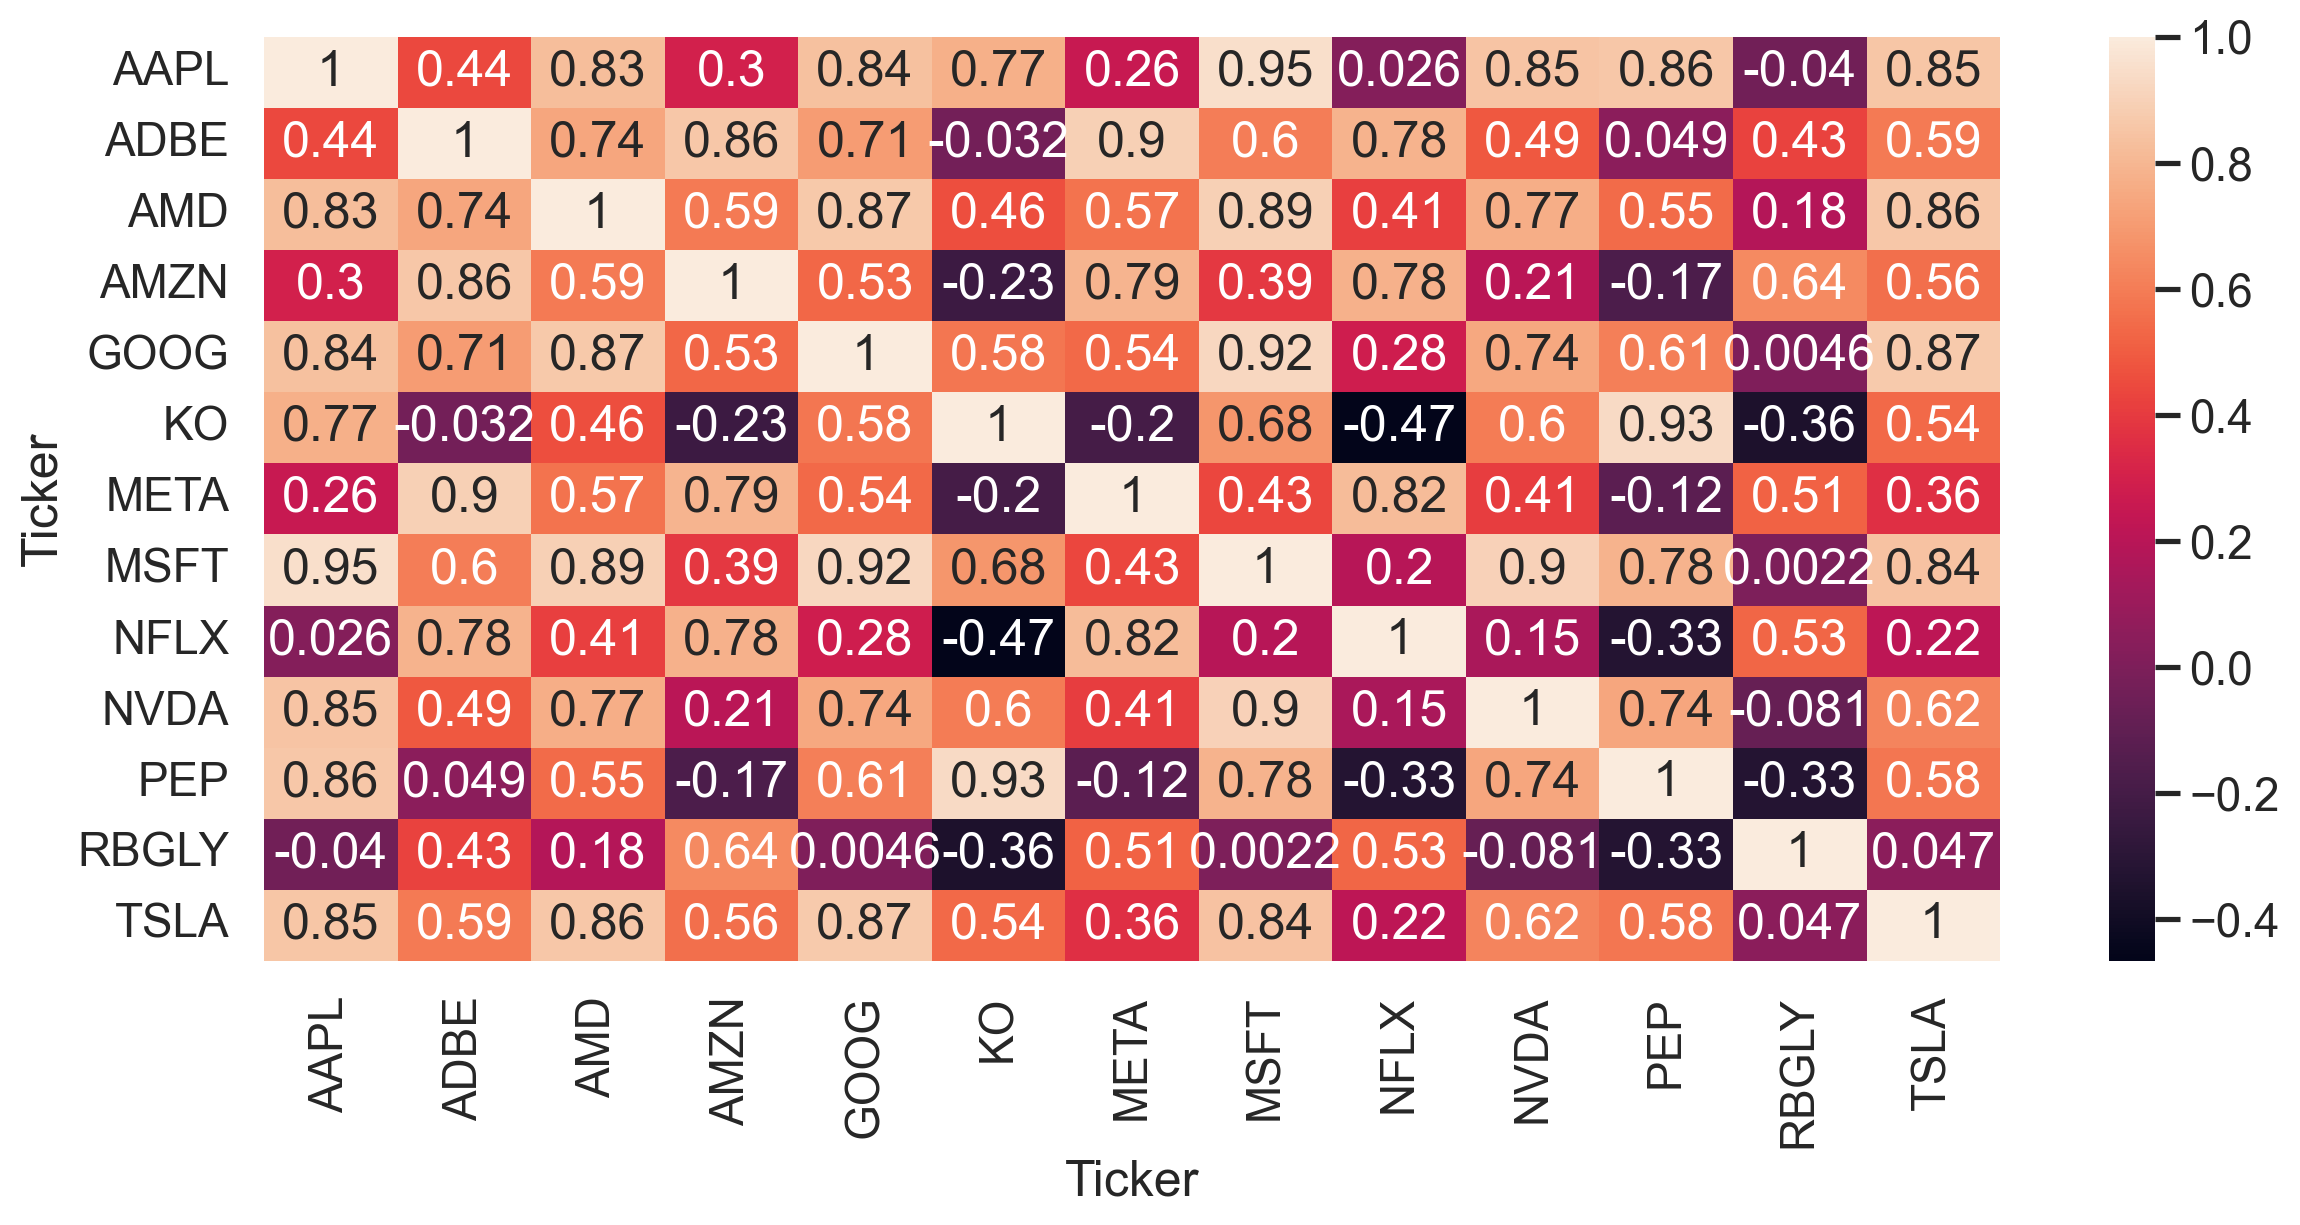

In [35]:
import seaborn as sn
from matplotlib.pyplot import figure

sn.heatmap(corr_matrix, annot = True)

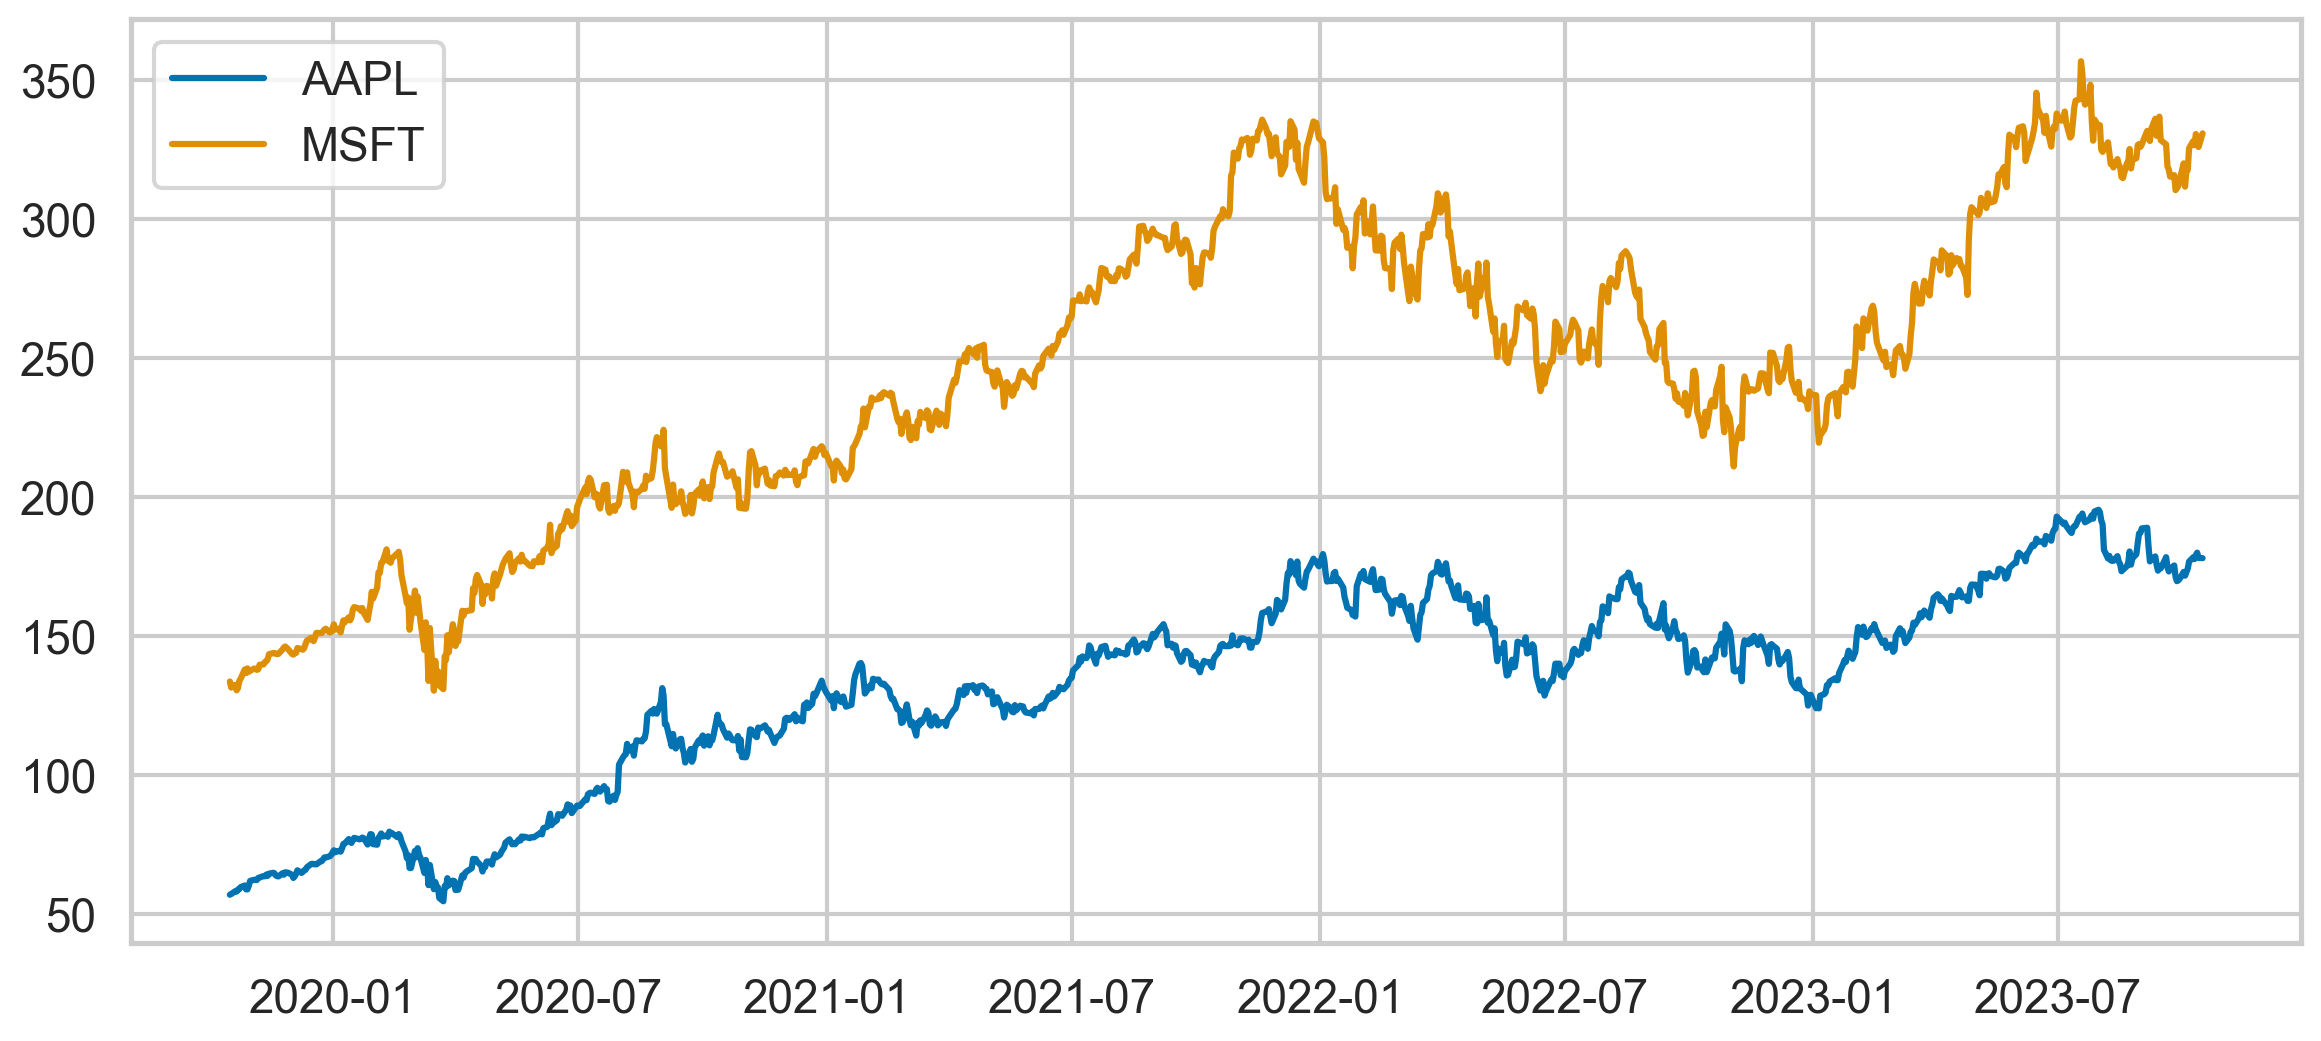

In [16]:
import matplotlib.pyplot as plt

AAPL = stocks_df['AAPL'] 
MSFT = stocks_df['MSFT']

# HOWEVER, let's check out the relationship between the stocks...

plt.plot(AAPL, label = "AAPL")
plt.plot(MSFT, label = "MSFT")
plt.legend()
# oh... that's why the correlation seem very high. The data are not 'standardized.'
# Let's look at a different one...

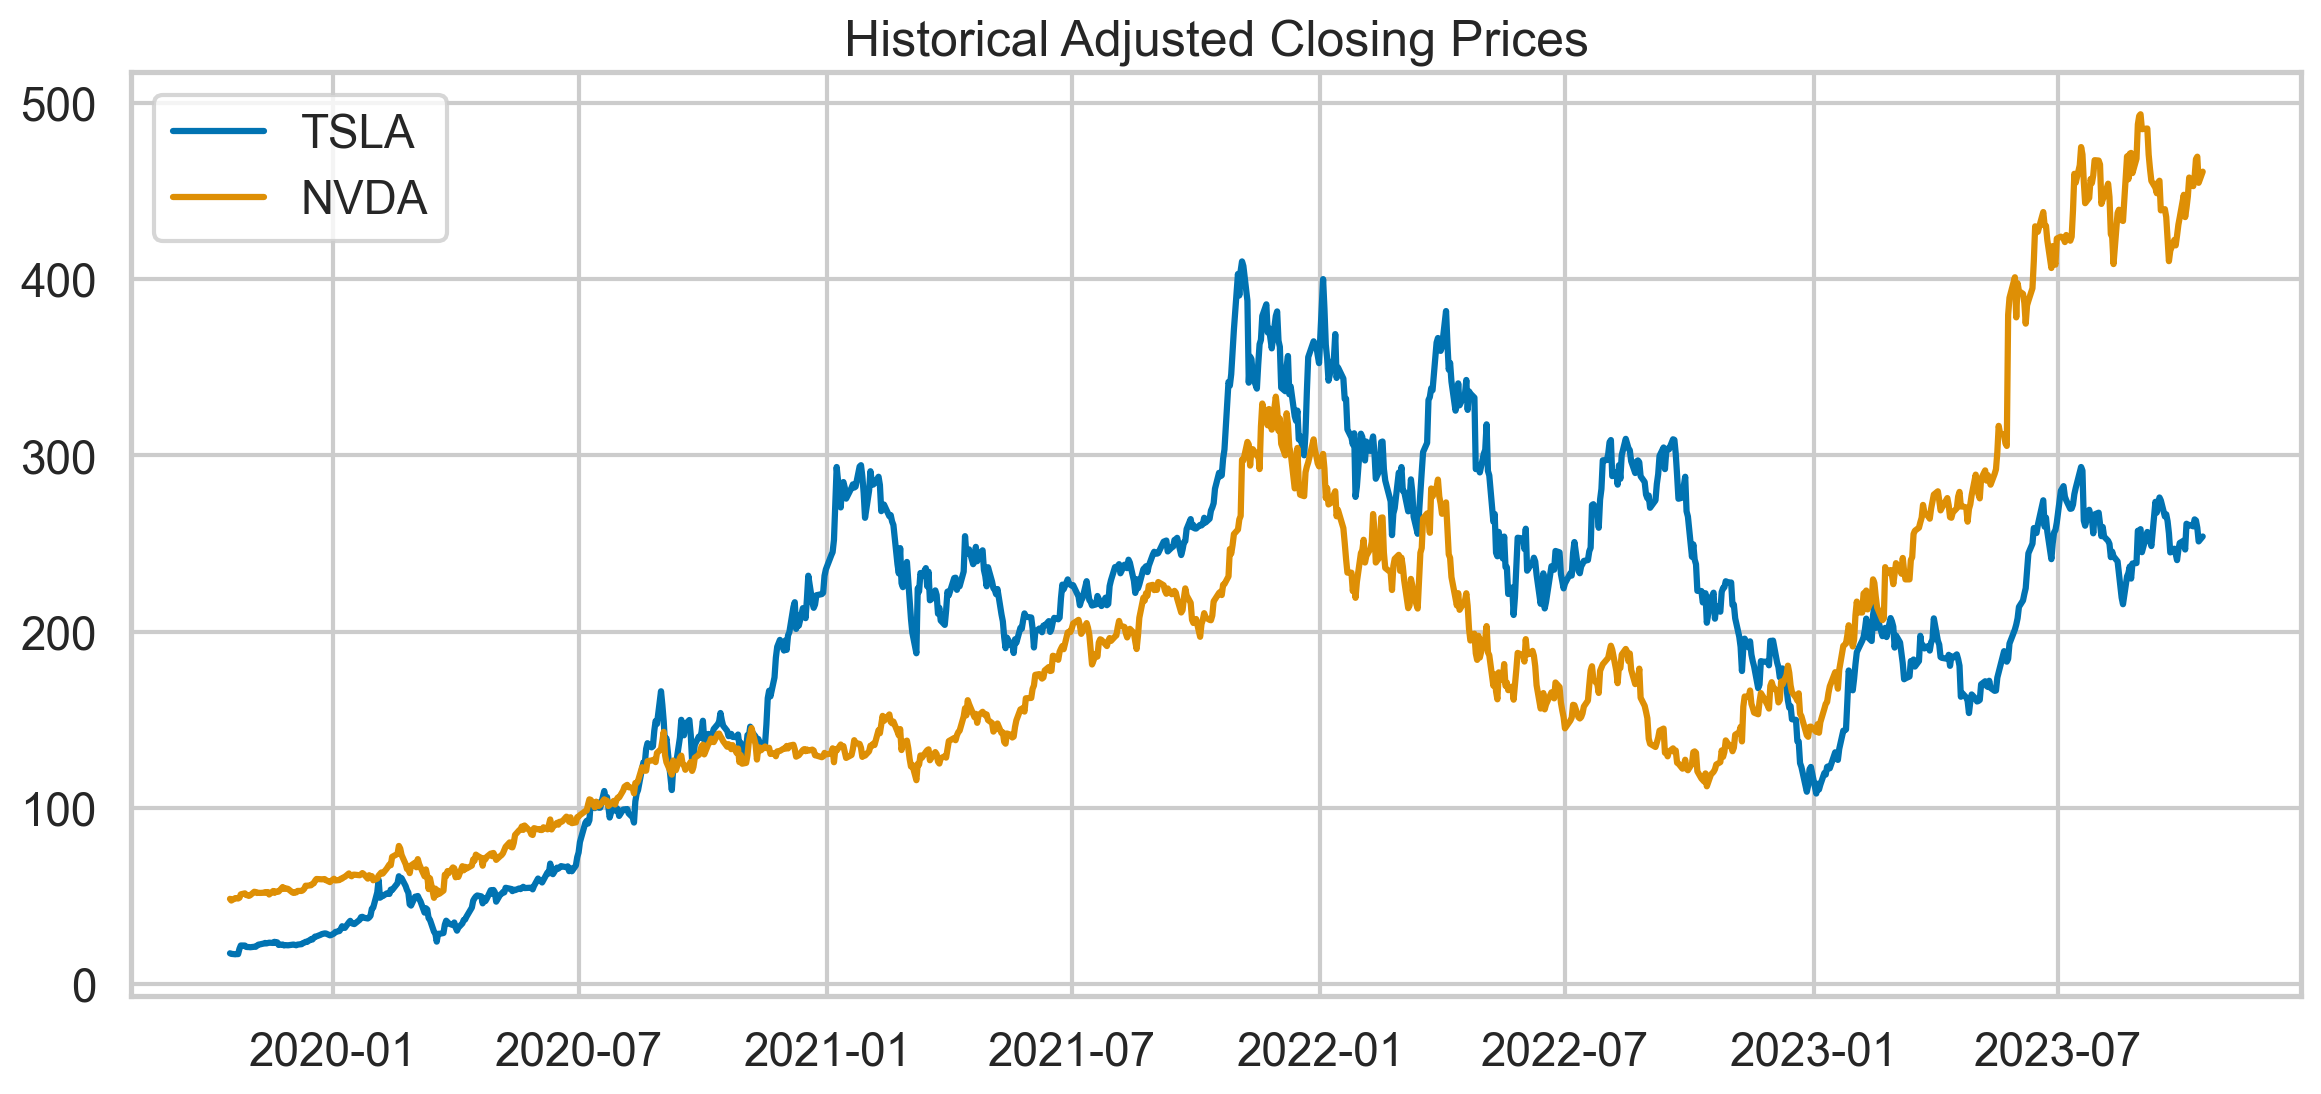

In [17]:
TSLA = stocks_df['TSLA']
NVDA = stocks_df['NVDA']
plt.plot(TSLA, label = "TSLA")
plt.plot(NVDA, label = "NVDA")
plt.title('Historical Adjusted Closing Prices')
plt.legend()

Text(0.5, 1.0, 'Spread between TSLA and NVDA')

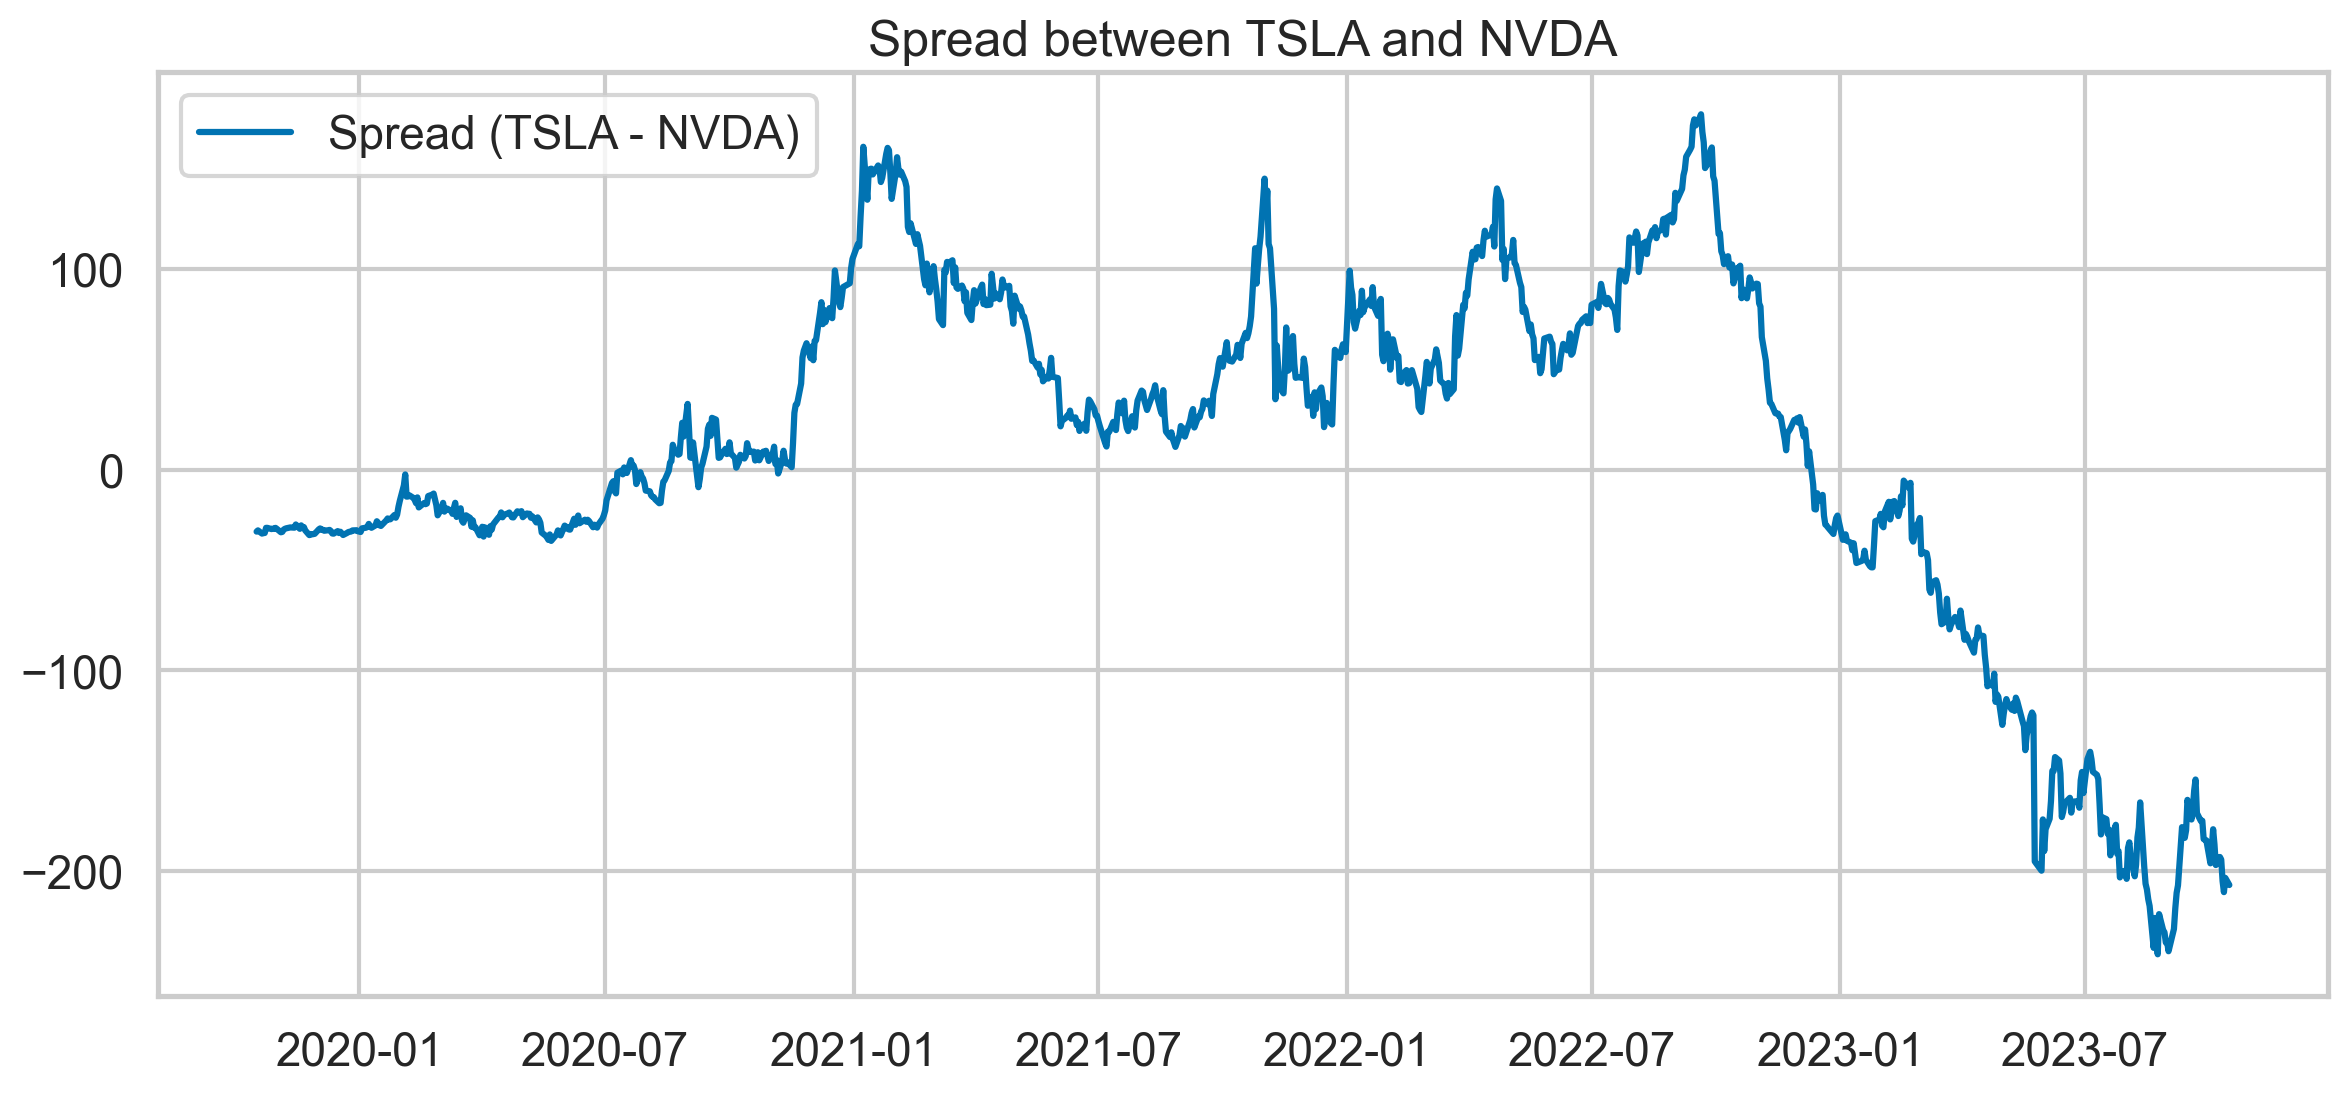

In [20]:
# plot the spread

plt.plot(TSLA - NVDA, label = 'Spread (TSLA - NVDA)')
plt.legend()
plt.title("Spread between TSLA and NVDA")

In [18]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(TSLA, NVDA)

In [19]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.718290595905203


In [20]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for TSLA and NVDA
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
TSLA_ADF = adfuller(TSLA)
print('P value for the Augmented Dickey-Fuller Test is', TSLA_ADF[1])
NVDA_ADF = adfuller(NVDA)
print('P value for the Augmented Dickey-Fuller Test is', NVDA_ADF[1])
Spread_ADF = adfuller(TSLA - NVDA)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(TSLA / NVDA)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of TSLA and NVDA

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.2330166209740473
P value for the Augmented Dickey-Fuller Test is 0.9674638303507171
P value for the Augmented Dickey-Fuller Test is 0.9300733412859326
P value for the Augmented Dickey-Fuller Test is 0.2814623150245776


Text(0.5, 1.0, 'Price Ratio between TSLA and NVDA')

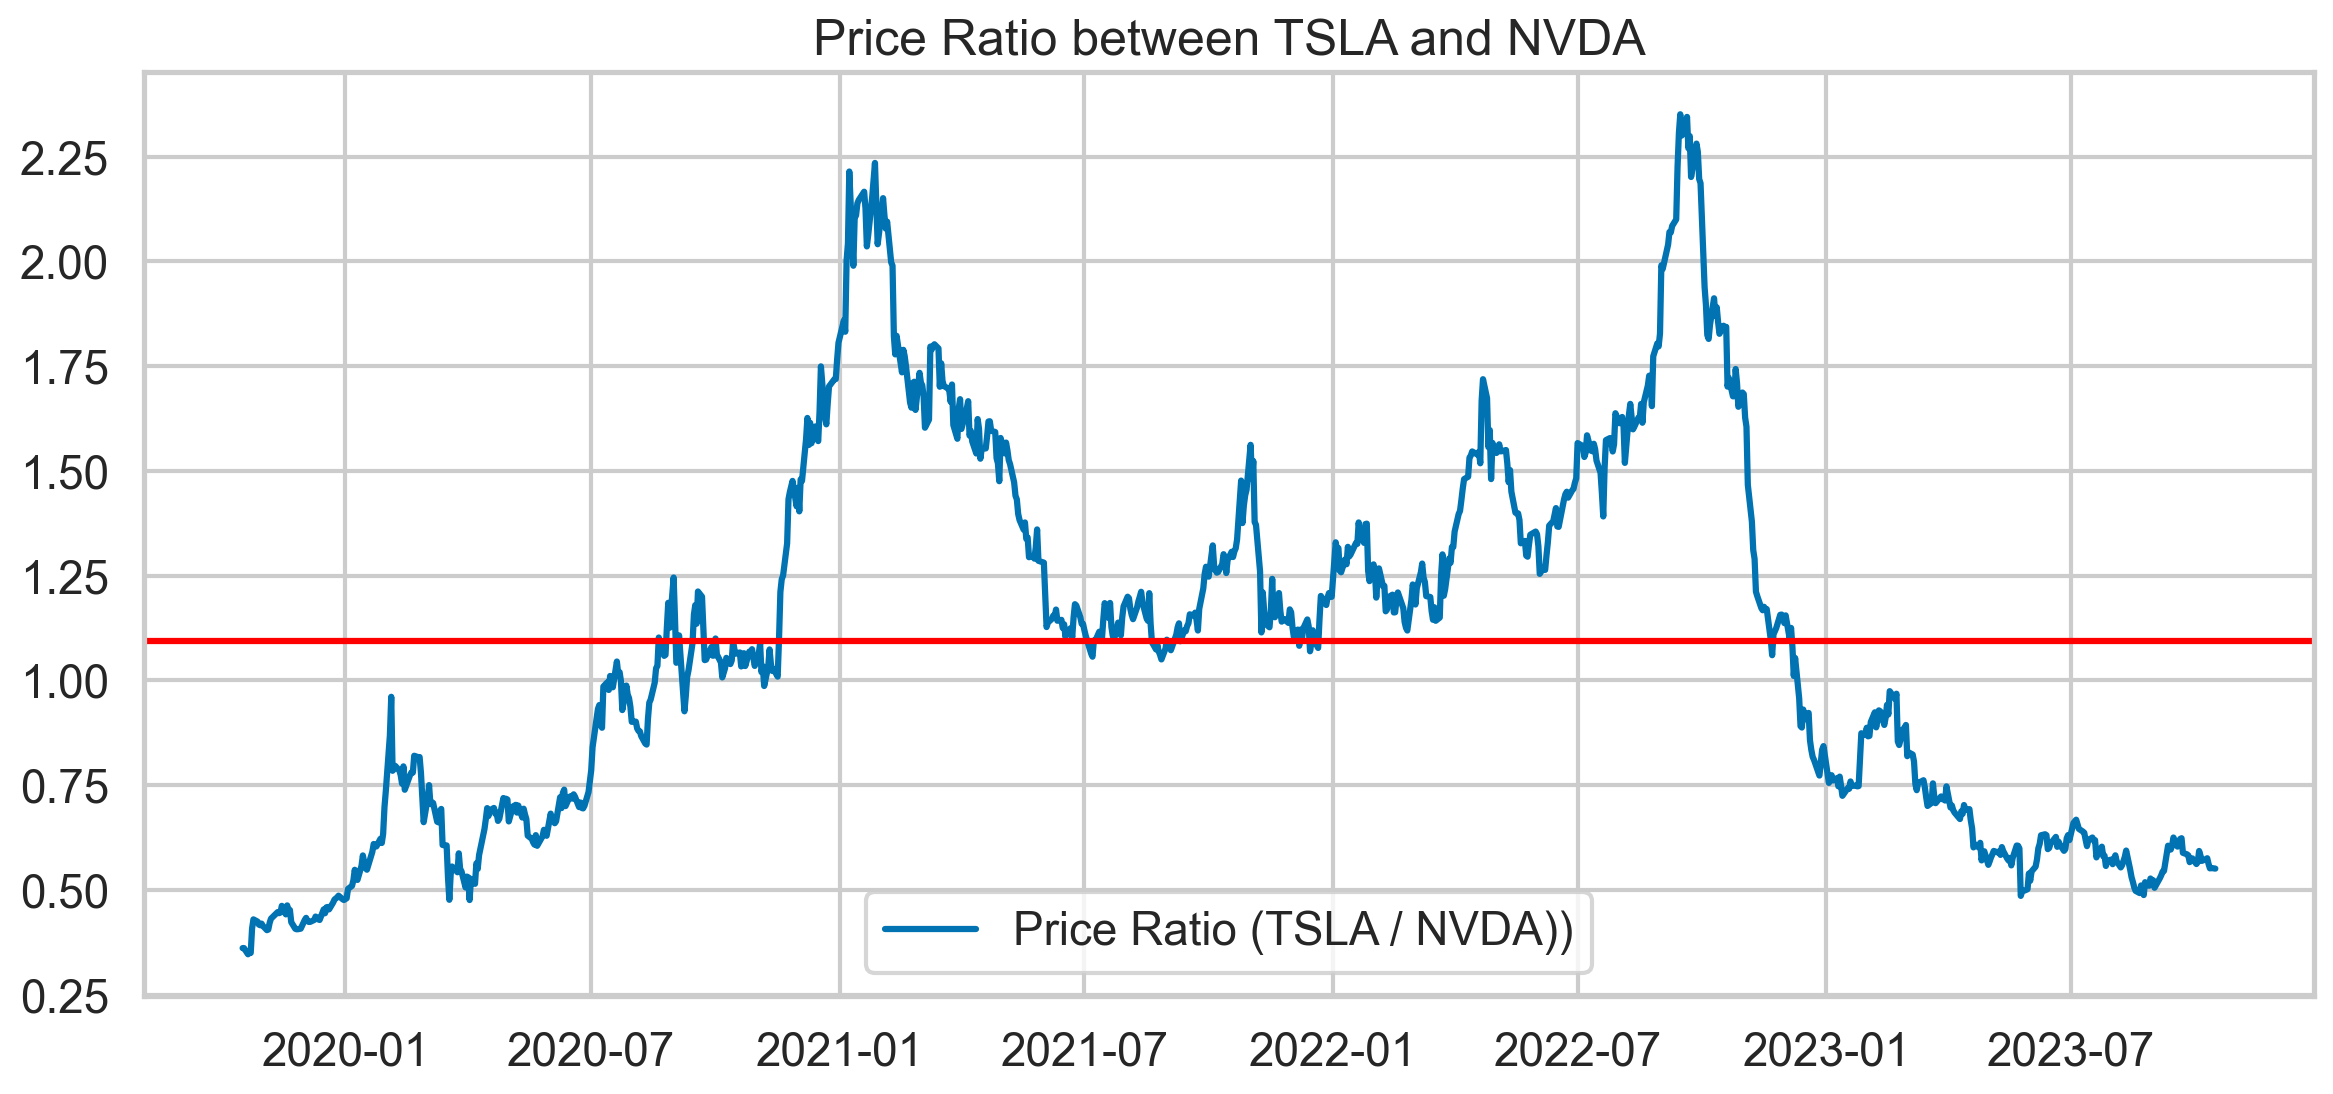

In [21]:
# Also, we can take a look at the price ratios between the two time series.

ratio = TSLA / NVDA
plt.plot(ratio, label = 'Price Ratio (TSLA / NVDA))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between TSLA and NVDA")

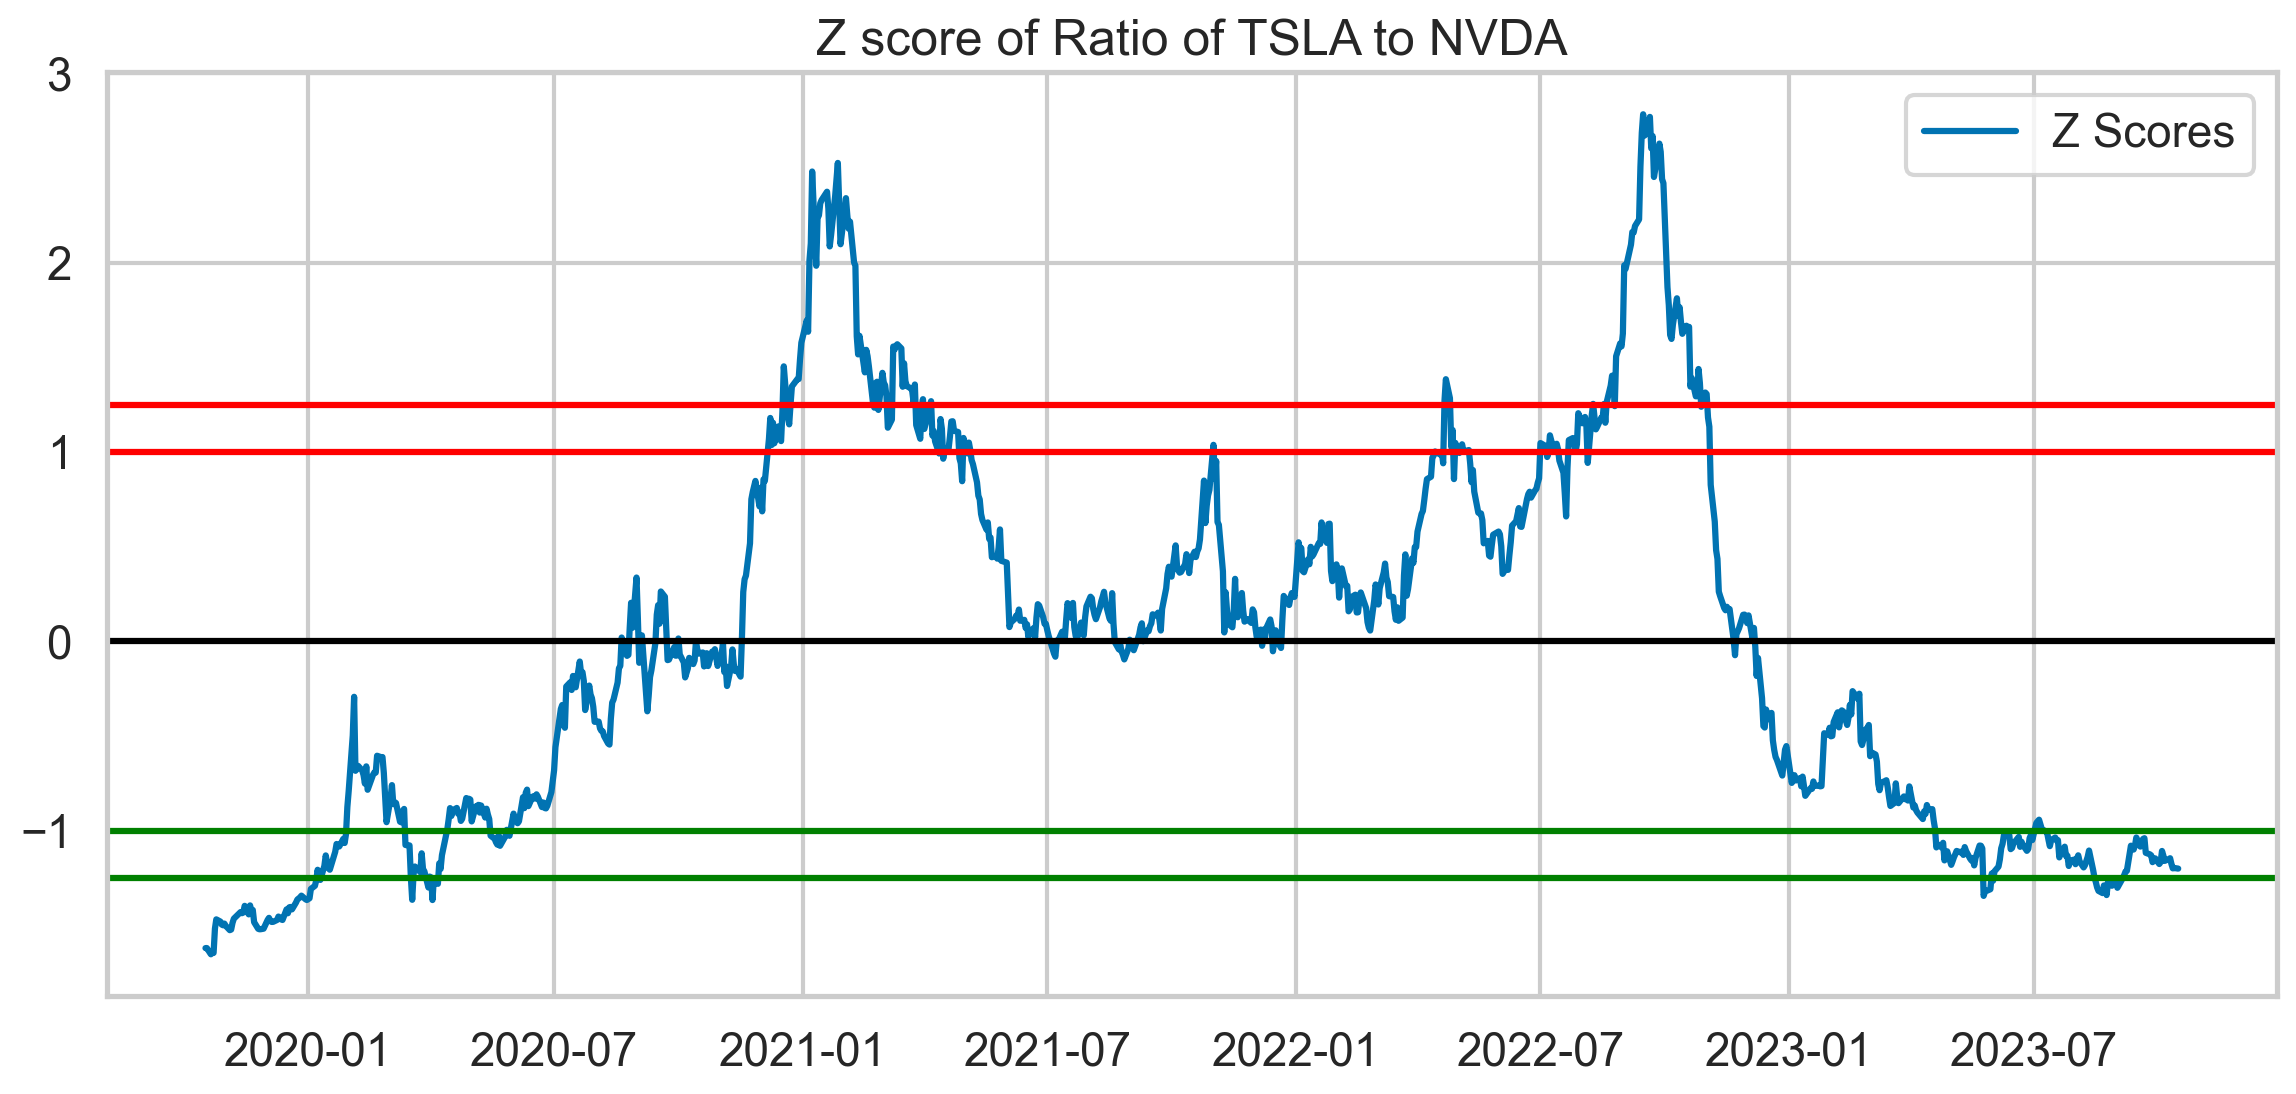

In [22]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.

# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of TSLA to NVDA')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (TSLA to NVDA).

In [23]:
# That's cool.. so when do we actually start trading? We need some form of 'signal' to trade (and to trade)
# This is where it can become an 'artform' AND a probability game.
# You could split 80 / 20 for train and test, BUT we are not going to be backtesting since we are just going over the model.
# train = ratio[0:round(0.8*len(ratio))]
# test = ratio[round(0.8*len(ratio)):]
# print('Do the splits check out?',len(train) + len(test) == len(ratio))

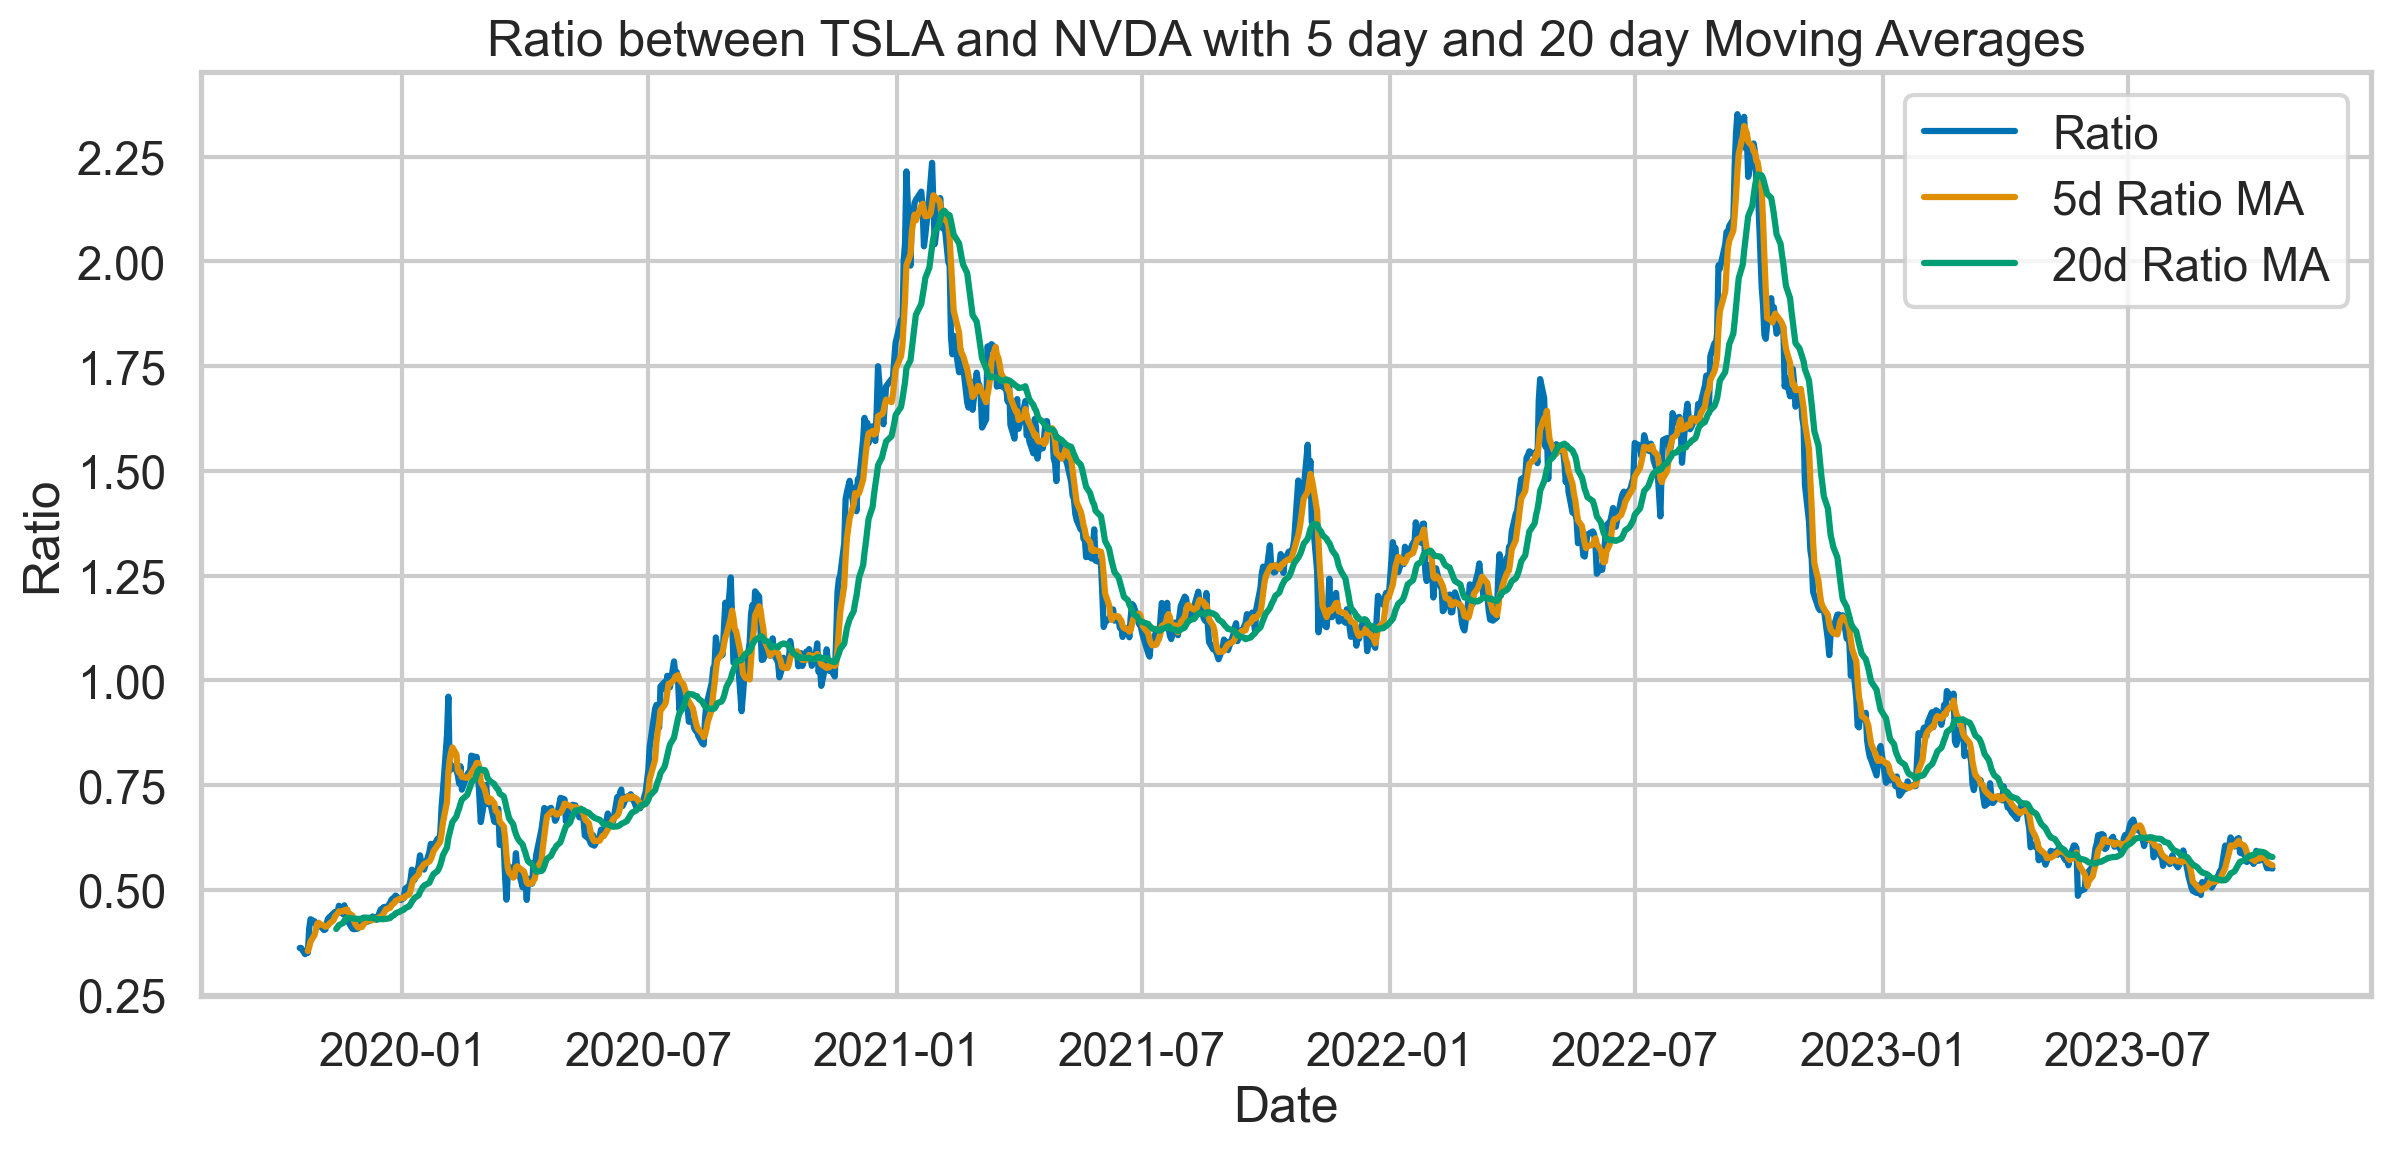

In [24]:
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between TSLA and NVDA with 5 day and 20 day Moving Averages')
plt.show()

SIMPLE STRATEGY

GO LONG THE SPREAD WHENEVER THE Z-SCORE IS BELOW -1.0 and -1.25

GO SHORT THE SPREAD WHEN THE Z-SCORE IS ABOVE 1.0 and 1.25

EXIT POSITION WHEN THE Z-SCORE APPROACHES 0.

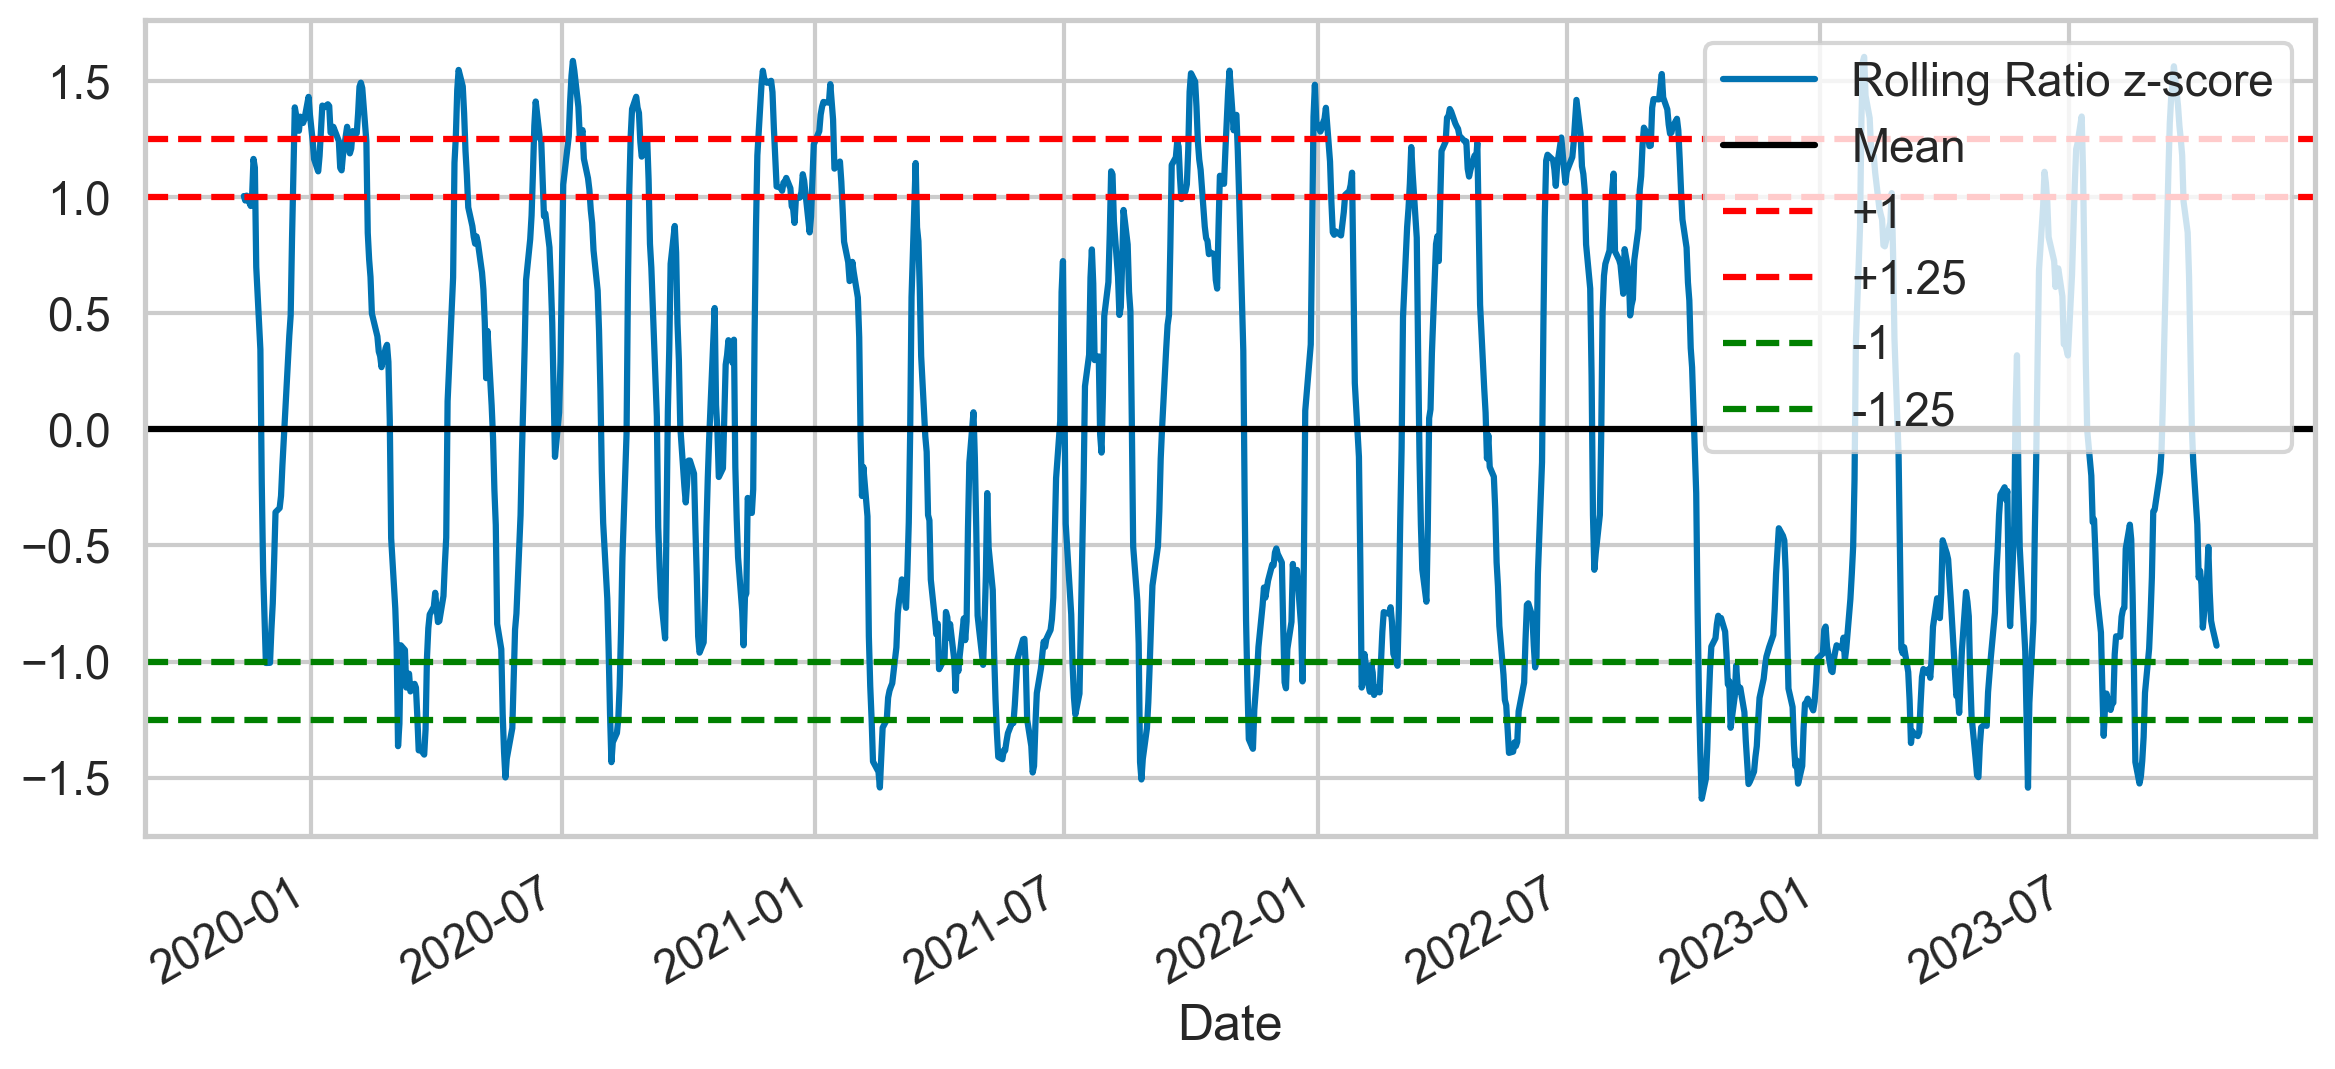

In [25]:
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

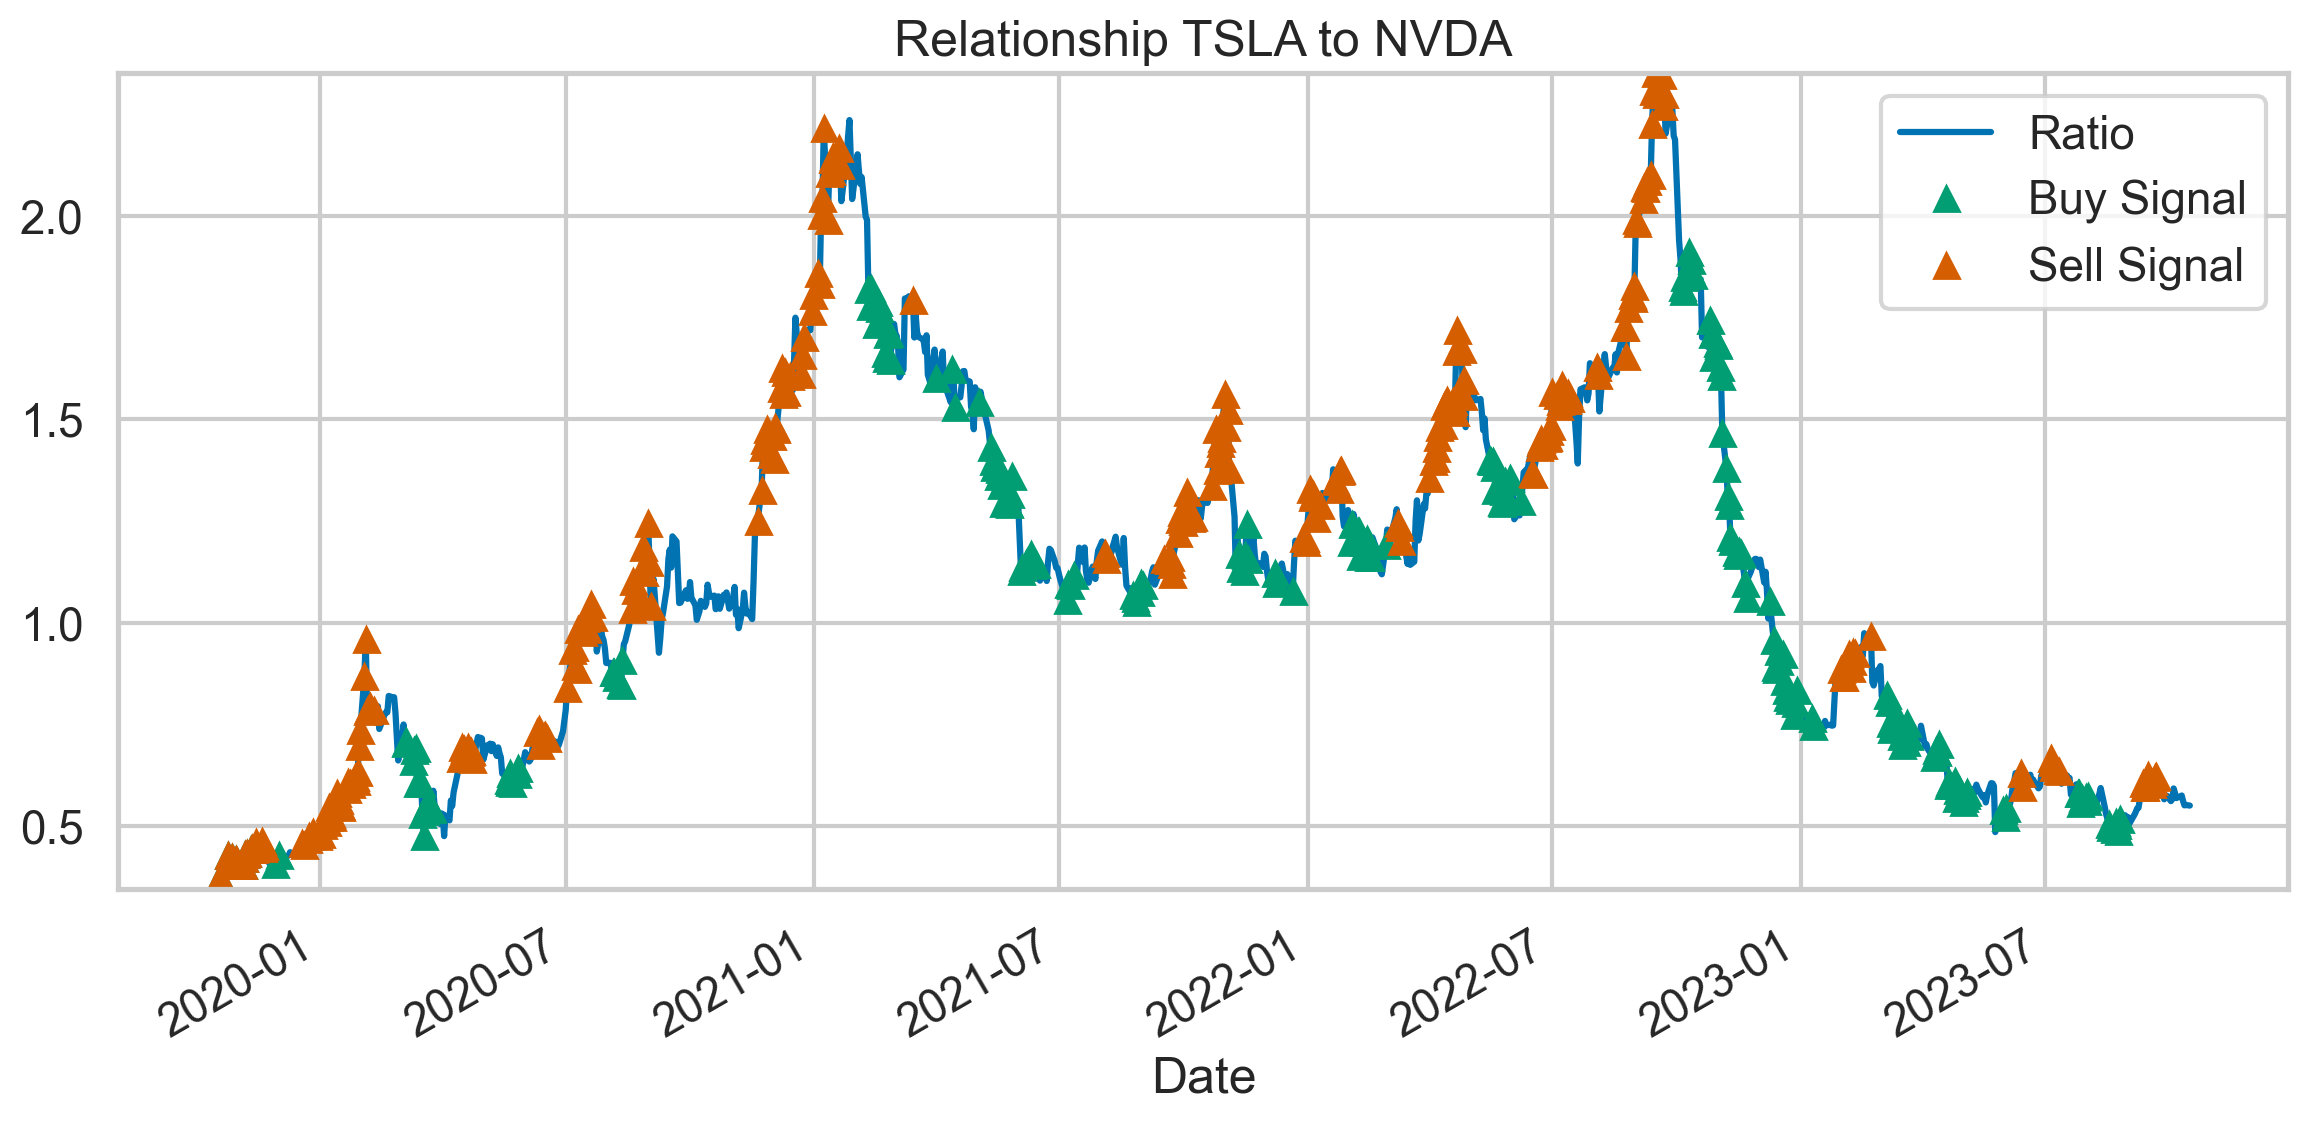

In [26]:
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship TSLA to NVDA')
plt.show()

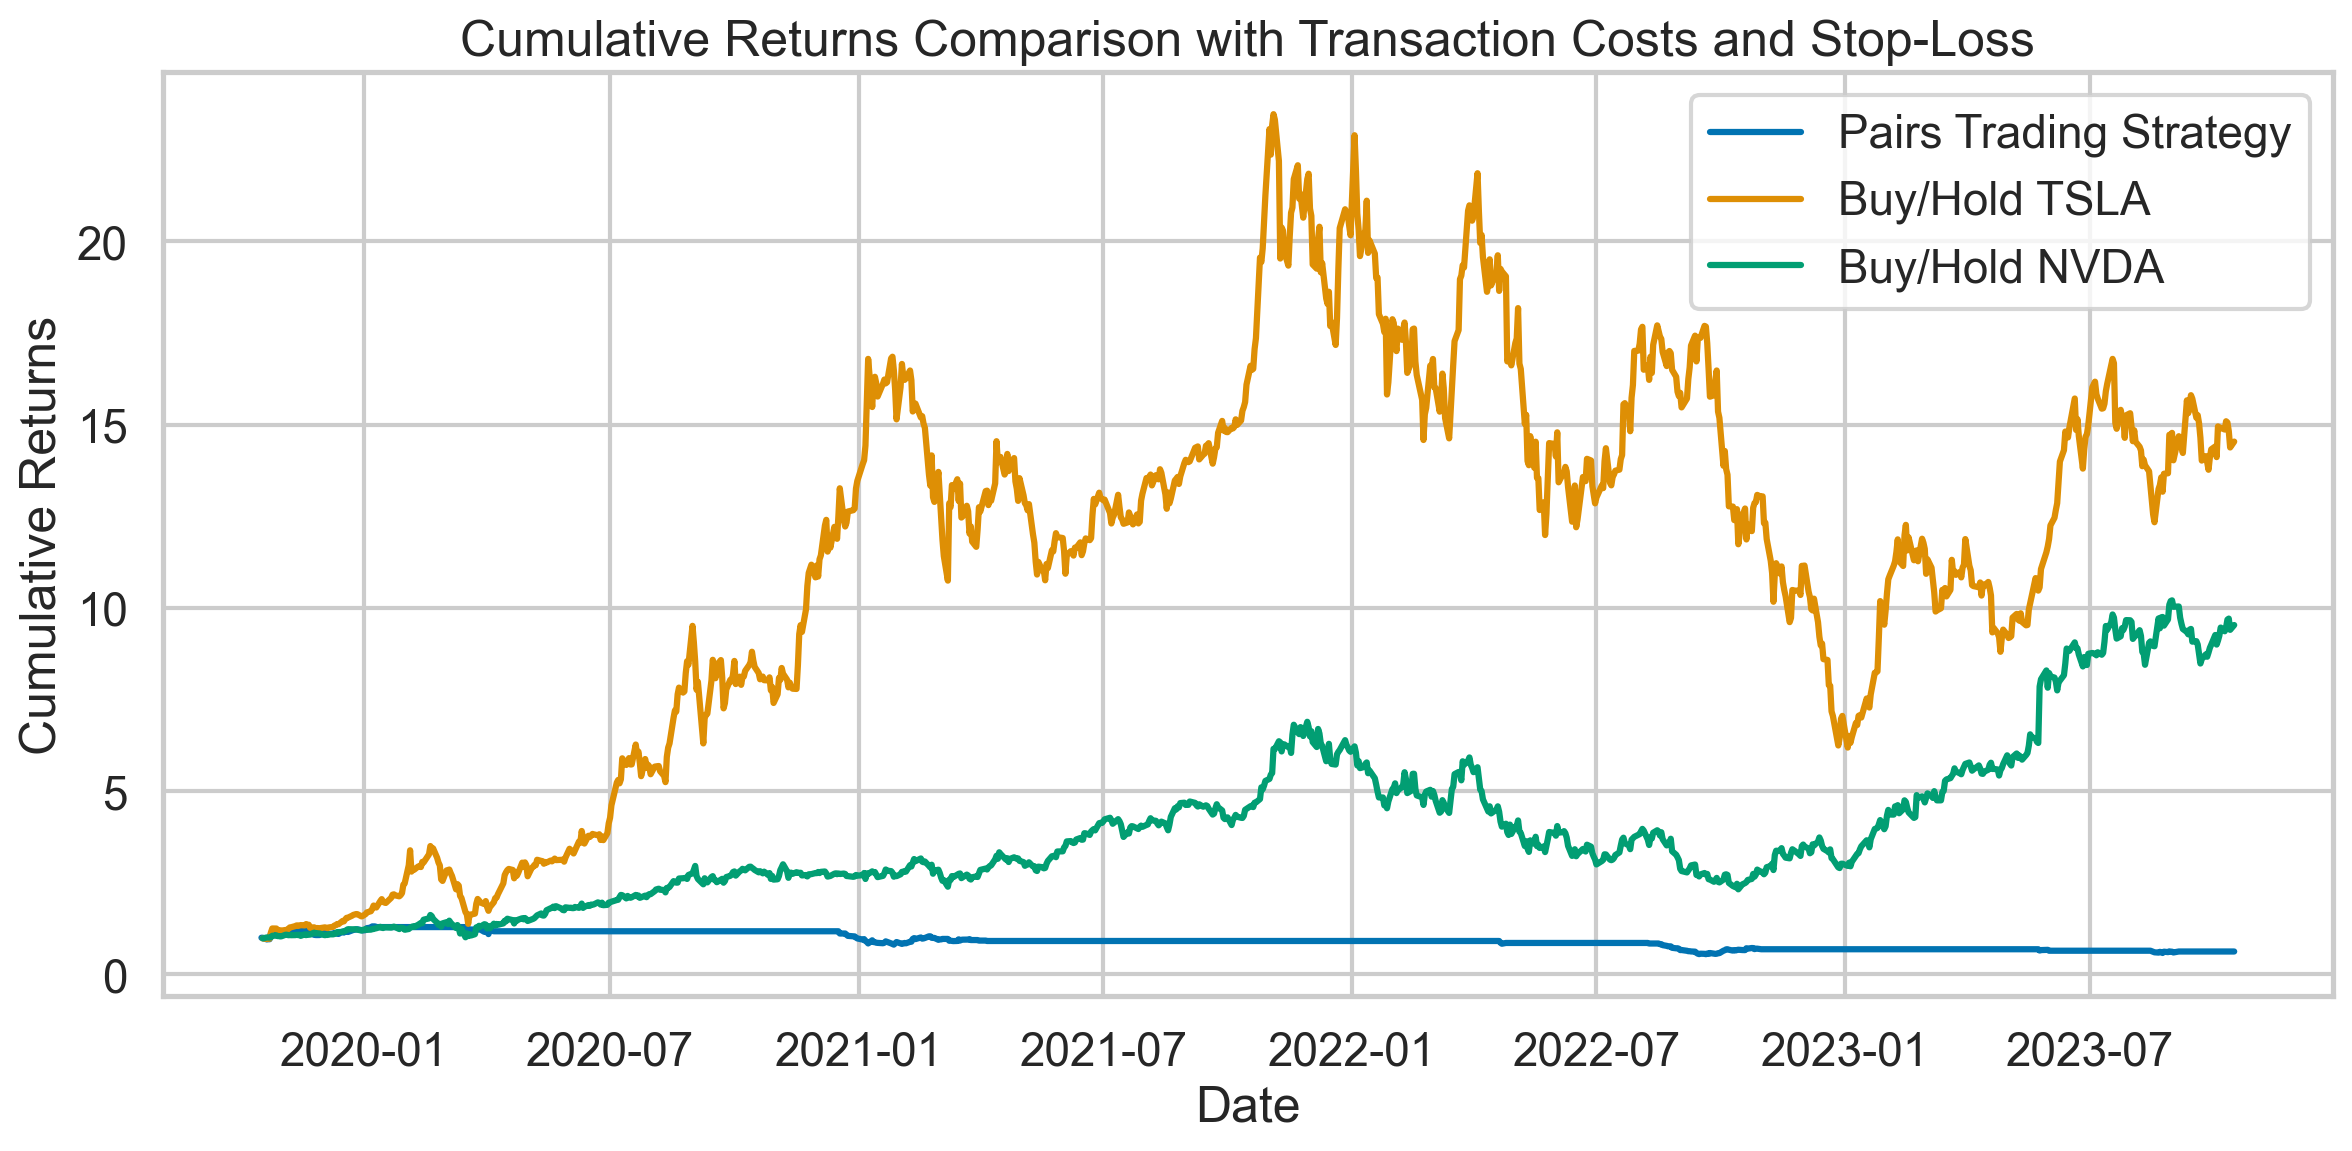

Pairs Trading Strategy Returns:  -0.37570344714413983
Buy and Hold TSLA Returns:  13.539069504063484
Buy and Hold NVDA Returns:  8.533211472585041


In [27]:
import numpy as np

# Parameters
transaction_cost = 0.001  # 0.1% transaction cost
stop_loss_threshold = -0.05  # 5% stop-loss

# Recalculate daily returns for each stock
stocks_df['TSLA_Returns'] = stocks_df['TSLA'].pct_change()
stocks_df['NVDA_Returns'] = stocks_df['NVDA'].pct_change()

# Initialize columns for strategy returns
stocks_df['Strategy_Returns'] = 0.0

# Adjust the strategy to consider multiple thresholds
for i in range(1, len(stocks_df)):
    if df_zscore[i] < -1.25:
        # Long TSLA, short NVDA
        trade_return = stocks_df['TSLA_Returns'][i] - stocks_df['NVDA_Returns'][i]
        # Apply stop-loss
        if trade_return < stop_loss_threshold:
            trade_return = stop_loss_threshold
        # Apply transaction cost
        stocks_df['Strategy_Returns'][i] = trade_return - 2 * transaction_cost
    elif df_zscore[i] > 1.25:
        # Short TSLA, long NVDA
        trade_return = -stocks_df['TSLA_Returns'][i] + stocks_df['NVDA_Returns'][i]
        # Apply stop-loss
        if trade_return < stop_loss_threshold:
            trade_return = stop_loss_threshold
        # Apply transaction cost
        stocks_df['Strategy_Returns'][i] = trade_return - 2 * transaction_cost
    else:
        # No trade
        stocks_df['Strategy_Returns'][i] = 0.0

# Calculate the cumulative returns for the strategy
stocks_df['Cumulative_Strategy_Returns'] = (1 + stocks_df['Strategy_Returns']).cumprod()

# Calculate the cumulative returns for a buy-and-hold strategy for each stock
stocks_df['Cumulative_TSLA_Returns'] = (1 + stocks_df['TSLA_Returns']).cumprod()
stocks_df['Cumulative_NVDA_Returns'] = (1 + stocks_df['NVDA_Returns']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(14, 6))
plt.plot(stocks_df['Cumulative_Strategy_Returns'], label='Pairs Trading Strategy')
plt.plot(stocks_df['Cumulative_TSLA_Returns'], label='Buy/Hold TSLA')
plt.plot(stocks_df['Cumulative_NVDA_Returns'], label='Buy/Hold NVDA')
plt.legend(loc='best')
plt.title('Cumulative Returns Comparison with Transaction Costs and Stop-Loss')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Print the final cumulative returns
print('Pairs Trading Strategy Returns: ', stocks_df['Cumulative_Strategy_Returns'].iloc[-1] - 1)
print('Buy and Hold TSLA Returns: ', stocks_df['Cumulative_TSLA_Returns'].iloc[-1] - 1)
print('Buy and Hold NVDA Returns: ', stocks_df['Cumulative_NVDA_Returns'].iloc[-1] - 1)


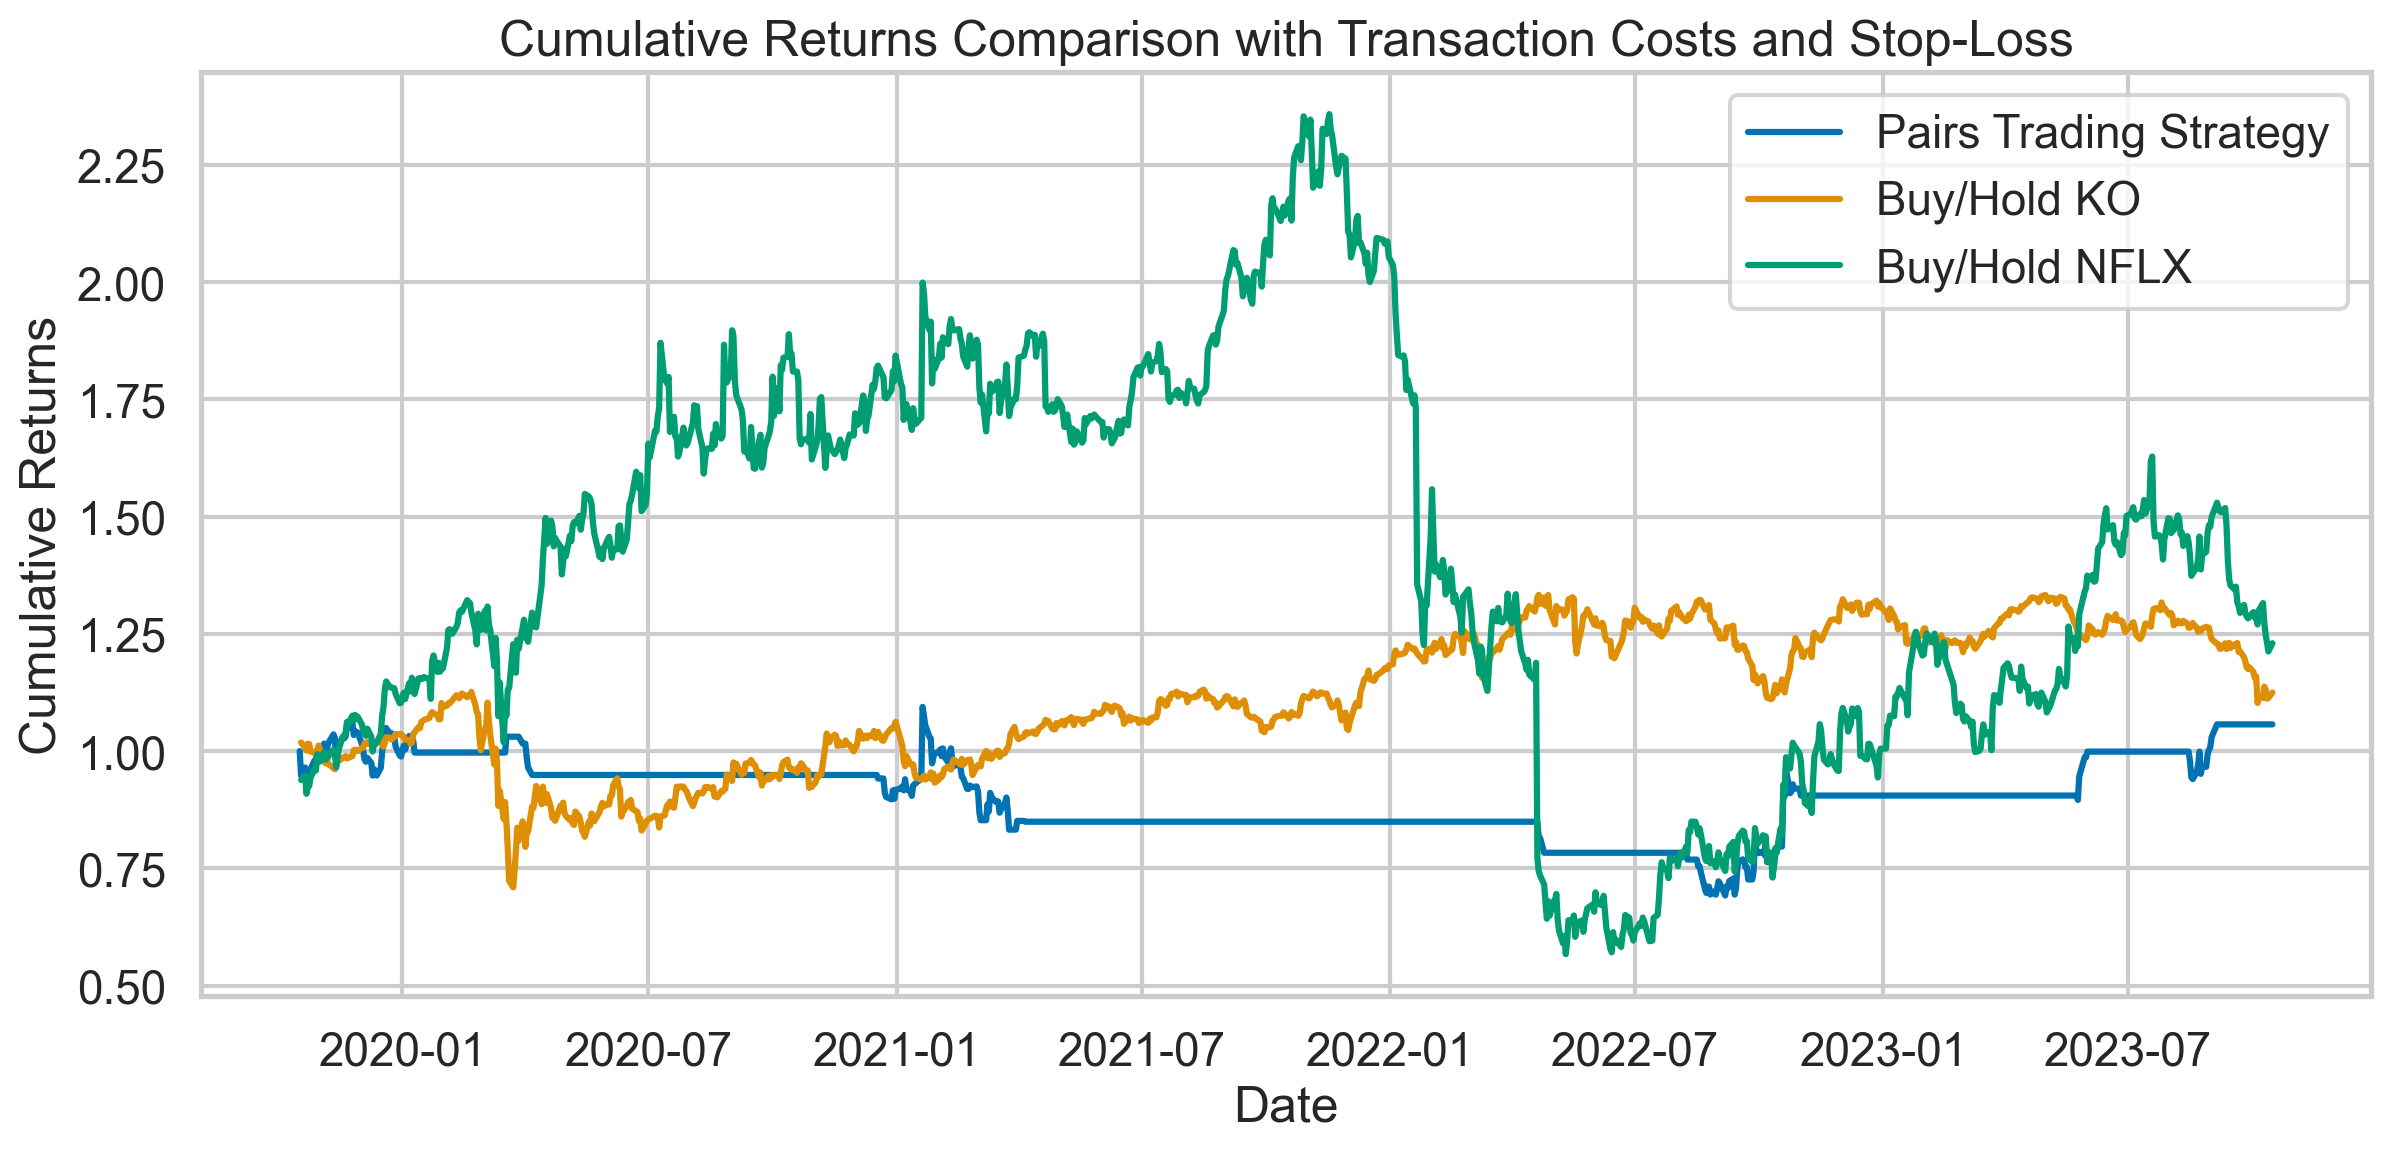

Pairs Trading Strategy Returns:  0.057030770048555945
Buy and Hold KO Returns:  0.12490803549454466
Buy and Hold NFLX Returns:  0.22999829492723634


In [28]:
import numpy as np

# Parameters
transaction_cost = 0.001  # 0.1% transaction cost
stop_loss_threshold = -0.05  # 5% stop-loss

# Recalculate daily returns for each stock
stocks_df['NFLX_Returns'] = stocks_df['NFLX'].pct_change()
stocks_df['KO_Returns'] = stocks_df['KO'].pct_change()

# Initialize columns for strategy returns
stocks_df['Strategy_Returns'] = 0.0

# Adjust the strategy to consider multiple thresholds
for i in range(1, len(stocks_df)):
    if df_zscore[i] < -1.25:
        # Long TSLA, short NVDA
        trade_return = stocks_df['NFLX_Returns'][i] - stocks_df['KO_Returns'][i]
        # Apply stop-loss
        if trade_return < stop_loss_threshold:
            trade_return = stop_loss_threshold
        # Apply transaction cost
        stocks_df['Strategy_Returns'][i] = trade_return - 2 * transaction_cost
    elif df_zscore[i] > 1.25:
        # Short TSLA, long NVDA
        trade_return = -stocks_df['KO_Returns'][i] + stocks_df['NFLX_Returns'][i]
        # Apply stop-loss
        if trade_return < stop_loss_threshold:
            trade_return = stop_loss_threshold
        # Apply transaction cost
        stocks_df['Strategy_Returns'][i] = trade_return - 2 * transaction_cost
    else:
        # No trade
        stocks_df['Strategy_Returns'][i] = 0.0

# Calculate the cumulative returns for the strategy
stocks_df['Cumulative_Strategy_Returns'] = (1 + stocks_df['Strategy_Returns']).cumprod()

# Calculate the cumulative returns for a buy-and-hold strategy for each stock
stocks_df['Cumulative_KO_Returns'] = (1 + stocks_df['KO_Returns']).cumprod()
stocks_df['Cumulative_NFLX_Returns'] = (1 + stocks_df['NFLX_Returns']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(14, 6))
plt.plot(stocks_df['Cumulative_Strategy_Returns'], label='Pairs Trading Strategy')
plt.plot(stocks_df['Cumulative_KO_Returns'], label='Buy/Hold KO')
plt.plot(stocks_df['Cumulative_NFLX_Returns'], label='Buy/Hold NFLX')
plt.legend(loc='best')
plt.title('Cumulative Returns Comparison with Transaction Costs and Stop-Loss')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Print the final cumulative returns
print('Pairs Trading Strategy Returns: ', stocks_df['Cumulative_Strategy_Returns'].iloc[-1] - 1)
print('Buy and Hold KO Returns: ', stocks_df['Cumulative_KO_Returns'].iloc[-1] - 1)
print('Buy and Hold NFLX Returns: ', stocks_df['Cumulative_NFLX_Returns'].iloc[-1] - 1)
